In [1]:
%%javascript
IPython.notebook.kernel.execute('version = "' + IPython.notebook.notebook_name + '"')

<IPython.core.display.Javascript object>

In [2]:
# coding=gbk
import os
if os.getcwd()[-9:] == 'notebooks':
    os.chdir("..")
import pickle, datetime, copy
from copy import deepcopy
from sklearn.model_selection import train_test_split, TimeSeriesSplit
import matplotlib.pyplot as plt
import pandas as pd
import utils, utils_eda, evaluator, utils_train
import evaluator as ev
from evaluator import Evaluator


# 文件处理参数
PATH_ORI_DATA = r'C:\Users\lucid\Documents\长江实习\课题之自上而下\data'
if_update = False  ## 原始数据文件是否已经更新
use_cache = True  ## 预处理逻辑/参数变更 or 缓存的pickle需要更新时，设为False (注意利用的数据格式，避免用本月行情预测本月行情。)
version = version.split('.')[0]

# 预处理参数
if_cls = False
align_to = 'month'
use_lag_x = 15
begT = '2004-01'
endT = datetime.date.today()

# 训练参数
n_splits = 10  ## 滚动训练次数
pipe='post_FE'
force_train=False  ## 因为每个时间段筛选出的特征不一样，所以必须重新get dump，为了节省时间调试可以False
same_model=False ## 选取pipelines时是否用不同pipe

print('version:', version)

/Users/Gary/opt/anaconda3/envs/MLenv/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


version: reg_0929


/Users/Gary/opt/anaconda3/envs/MLenv/lib/python3.9/site-packages/tpot/builtins/__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")


In [3]:
X, y_ret = utils.get_preproc_data(PATH_ORI_DATA, if_update, use_cache, use_lag_x, align_to, begT, endT)
if if_cls:
    y_cls = utils.reg_to_class(y_ret, 3)
    y = y_cls
else:
    y = y_ret

data pickle loaded


In [4]:
tscv = TimeSeriesSplit(n_splits=n_splits)
models_list = {}
# 原始的Xy切片之前要deepcopy，否则可能莫名其妙篡改原始数据
for train_index, test_index in tscv.split(X.copy(deep=True)):
    if X.index[len(train_index)] < pd.Period('2014-1'):
        continue
    else:
        X_train, y_train = X.copy(deep=True).iloc[train_index, :], y.copy(deep=True).iloc[train_index, :]
        print("/nTRAIN period:", str(X_train.index[0]), '->', str(X_train.index[-1]), "\nStart training.......................")
        
        models = utils_train.get_models_dump(X_train, y_train, pipe=pipe, version=version, force_train=force_train, same_model=same_model)
        models_list[str(X_train.index[-1])]=deepcopy(models)

/nTRAIN period: 2006-12 -> 2014-01 
Start training.......................
...initializing MacroFE


/Users/Gary/opt/anaconda3/envs/MLenv/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


...transforming MacroFE
model 0 pickle saved and appended
...transforming MacroFE
model 1 pickle saved and appended
...transforming MacroFE


/Users/Gary/opt/anaconda3/envs/MLenv/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:294: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  warnings.warn(
/Users/Gary/opt/anaconda3/envs/MLenv/lib/python3.9/site-packages/sklearn/linear_model/_least_angle.py:649: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=5.174e-04, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.107e-08. Reduce max_iter or increase eps parameters.
  warnings.warn(
/Users/Gary/opt/anaconda3/envs/MLenv/lib/python3.9/site-packages/sklearn/linear_model/_least_angle.py:649: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=4.866e-04, with an active set of 3 regressors, and the smallest cholesky pivot element being 1.825e-08. Reduce max_iter or increase eps parameters.
  warnings.wa

model 2 pickle saved and appended
...transforming MacroFE
model 3 pickle saved and appended
...transforming MacroFE


/Users/Gary/opt/anaconda3/envs/MLenv/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.025e-06, tolerance: 8.740e-07
  model = cd_fast.enet_coordinate_descent(
/Users/Gary/opt/anaconda3/envs/MLenv/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.372e-06, tolerance: 8.740e-07
  model = cd_fast.enet_coordinate_descent(
/Users/Gary/opt/anaconda3/envs/MLenv/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or co

/Users/Gary/opt/anaconda3/envs/MLenv/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.790e-07, tolerance: 4.474e-07
  model = cd_fast.enet_coordinate_descent(
/Users/Gary/opt/anaconda3/envs/MLenv/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.677e-07, tolerance: 4.474e-07
  model = cd_fast.enet_coordinate_descent(
/Users/Gary/opt/anaconda3/envs/MLenv/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or co

/Users/Gary/opt/anaconda3/envs/MLenv/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.179e-06, tolerance: 8.681e-07
  model = cd_fast.enet_coordinate_descent(
/Users/Gary/opt/anaconda3/envs/MLenv/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.358e-06, tolerance: 8.681e-07
  model = cd_fast.enet_coordinate_descent(
/Users/Gary/opt/anaconda3/envs/MLenv/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or co

/Users/Gary/opt/anaconda3/envs/MLenv/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.002e-06, tolerance: 8.903e-07
  model = cd_fast.enet_coordinate_descent(
/Users/Gary/opt/anaconda3/envs/MLenv/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.927e-06, tolerance: 8.903e-07
  model = cd_fast.enet_coordinate_descent(
/Users/Gary/opt/anaconda3/envs/MLenv/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or co

model 4 pickle saved and appended
...transforming MacroFE


/Users/Gary/opt/anaconda3/envs/MLenv/lib/python3.9/site-packages/sklearn/linear_model/_least_angle.py:679: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 20 iterations, alpha=1.263e-03, previous alpha=1.261e-03, with an active set of 21 regressors.
  warnings.warn(
/Users/Gary/opt/anaconda3/envs/MLenv/lib/python3.9/site-packages/sklearn/linear_model/_least_angle.py:649: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=5.788e-03, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn(
/Users/Gary/opt/anaconda3/envs/MLenv/lib/python3.9/site-packages/sklearn/linear_model/_least_angle.py:649: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=4.535e-03, with an active set of 2 regressors

model 5 pickle saved and appended
...transforming MacroFE
model 6 pickle saved and appended
...transforming MacroFE
model 7 pickle saved and appended
...transforming MacroFE
model 8 pickle saved and appended
...transforming MacroFE


/Users/Gary/opt/anaconda3/envs/MLenv/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:301: FutureWarning: The loss 'lad' was deprecated in v1.0 and will be removed in version 1.2. Use 'absolute_error' which is equivalent.
  warnings.warn(


model 9 pickle saved and appended
/nTRAIN period: 2006-12 -> 2015-06 
Start training.......................
...transforming MacroFE
model 0 pickle saved and appended
...transforming MacroFE
model 1 pickle saved and appended
...transforming MacroFE


/Users/Gary/opt/anaconda3/envs/MLenv/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:294: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  warnings.warn(
/Users/Gary/opt/anaconda3/envs/MLenv/lib/python3.9/site-packages/sklearn/linear_model/_least_angle.py:649: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=4.341e-04, with an active set of 4 regressors, and the smallest cholesky pivot element being 2.107e-08. Reduce max_iter or increase eps parameters.
  warnings.warn(
/Users/Gary/opt/anaconda3/envs/MLenv/lib/python3.9/site-packages/sklearn/linear_model/_least_angle.py:649: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 6 iterations, i.e. alpha=3.703e-04, with an active set of 6 regressors, and the smallest cholesky pivot element being 2.107e-08. Reduce max_iter or increase eps parameters.
  warnings.wa

model 2 pickle saved and appended
...transforming MacroFE
model 3 pickle saved and appended
...transforming MacroFE


/Users/Gary/opt/anaconda3/envs/MLenv/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.015e-06, tolerance: 9.934e-07
  model = cd_fast.enet_coordinate_descent(
/Users/Gary/opt/anaconda3/envs/MLenv/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.071e-06, tolerance: 9.934e-07
  model = cd_fast.enet_coordinate_descent(
/Users/Gary/opt/anaconda3/envs/MLenv/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or co

/Users/Gary/opt/anaconda3/envs/MLenv/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.081e-06, tolerance: 7.063e-07
  model = cd_fast.enet_coordinate_descent(
/Users/Gary/opt/anaconda3/envs/MLenv/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.518e-06, tolerance: 7.063e-07
  model = cd_fast.enet_coordinate_descent(
/Users/Gary/opt/anaconda3/envs/MLenv/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or co

/Users/Gary/opt/anaconda3/envs/MLenv/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.441e-06, tolerance: 9.932e-07
  model = cd_fast.enet_coordinate_descent(
/Users/Gary/opt/anaconda3/envs/MLenv/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.231e-06, tolerance: 9.932e-07
  model = cd_fast.enet_coordinate_descent(
/Users/Gary/opt/anaconda3/envs/MLenv/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or co

/Users/Gary/opt/anaconda3/envs/MLenv/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.355e-06, tolerance: 1.090e-06
  model = cd_fast.enet_coordinate_descent(
/Users/Gary/opt/anaconda3/envs/MLenv/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.167e-06, tolerance: 1.090e-06
  model = cd_fast.enet_coordinate_descent(
/Users/Gary/opt/anaconda3/envs/MLenv/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or co

model 4 pickle saved and appended
...transforming MacroFE


/Users/Gary/opt/anaconda3/envs/MLenv/lib/python3.9/site-packages/sklearn/linear_model/_least_angle.py:649: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=6.058e-03, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn(
/Users/Gary/opt/anaconda3/envs/MLenv/lib/python3.9/site-packages/sklearn/linear_model/_least_angle.py:649: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 7 iterations, i.e. alpha=3.248e-03, with an active set of 7 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn(
/Users/Gary/opt/anaconda3/envs/MLenv/lib/python3.9/site-packages/sklearn/linear_model/_least_angle.py:649: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 11 iterations, i.e. alpha=2.230e-03, with an

model 5 pickle saved and appended
...transforming MacroFE
model 6 pickle saved and appended
...transforming MacroFE
model 7 pickle saved and appended
...transforming MacroFE
model 8 pickle saved and appended
...transforming MacroFE


/Users/Gary/opt/anaconda3/envs/MLenv/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:301: FutureWarning: The loss 'lad' was deprecated in v1.0 and will be removed in version 1.2. Use 'absolute_error' which is equivalent.
  warnings.warn(


model 9 pickle saved and appended
/nTRAIN period: 2006-12 -> 2016-11 
Start training.......................
...transforming MacroFE
model 0 pickle saved and appended
...transforming MacroFE
model 1 pickle saved and appended
...transforming MacroFE


/Users/Gary/opt/anaconda3/envs/MLenv/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:294: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  warnings.warn(
/Users/Gary/opt/anaconda3/envs/MLenv/lib/python3.9/site-packages/sklearn/linear_model/_least_angle.py:649: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 9 iterations, i.e. alpha=2.708e-04, with an active set of 9 regressors, and the smallest cholesky pivot element being 2.980e-08. Reduce max_iter or increase eps parameters.
  warnings.warn(
/Users/Gary/opt/anaconda3/envs/MLenv/lib/python3.9/site-packages/sklearn/linear_model/_least_angle.py:649: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 9 iterations, i.e. alpha=2.708e-04, with an active set of 9 regressors, and the smallest cholesky pivot element being 1.825e-08. Reduce max_iter or increase eps parameters.
  warnings.wa

model 2 pickle saved and appended
...transforming MacroFE
model 3 pickle saved and appended
...transforming MacroFE


/Users/Gary/opt/anaconda3/envs/MLenv/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.018e-07, tolerance: 7.746e-07
  model = cd_fast.enet_coordinate_descent(
/Users/Gary/opt/anaconda3/envs/MLenv/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.107e-07, tolerance: 7.746e-07
  model = cd_fast.enet_coordinate_descent(
/Users/Gary/opt/anaconda3/envs/MLenv/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or co

/Users/Gary/opt/anaconda3/envs/MLenv/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.147e-06, tolerance: 7.746e-07
  model = cd_fast.enet_coordinate_descent(
/Users/Gary/opt/anaconda3/envs/MLenv/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.734e-06, tolerance: 7.746e-07
  model = cd_fast.enet_coordinate_descent(
/Users/Gary/opt/anaconda3/envs/MLenv/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or co

/Users/Gary/opt/anaconda3/envs/MLenv/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.582e-06, tolerance: 1.148e-06
  model = cd_fast.enet_coordinate_descent(
/Users/Gary/opt/anaconda3/envs/MLenv/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.733e-06, tolerance: 1.148e-06
  model = cd_fast.enet_coordinate_descent(
/Users/Gary/opt/anaconda3/envs/MLenv/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or co

/Users/Gary/opt/anaconda3/envs/MLenv/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.318e-06, tolerance: 1.056e-06
  model = cd_fast.enet_coordinate_descent(
/Users/Gary/opt/anaconda3/envs/MLenv/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.612e-06, tolerance: 1.056e-06
  model = cd_fast.enet_coordinate_descent(
/Users/Gary/opt/anaconda3/envs/MLenv/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or co

/Users/Gary/opt/anaconda3/envs/MLenv/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.329e-06, tolerance: 1.114e-06
  model = cd_fast.enet_coordinate_descent(
/Users/Gary/opt/anaconda3/envs/MLenv/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.030e-06, tolerance: 1.114e-06
  model = cd_fast.enet_coordinate_descent(
/Users/Gary/opt/anaconda3/envs/MLenv/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or co

model 4 pickle saved and appended
...transforming MacroFE


/Users/Gary/opt/anaconda3/envs/MLenv/lib/python3.9/site-packages/sklearn/linear_model/_least_angle.py:679: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 8 iterations, alpha=2.412e-03, previous alpha=2.404e-03, with an active set of 9 regressors.
  warnings.warn(
/Users/Gary/opt/anaconda3/envs/MLenv/lib/python3.9/site-packages/sklearn/linear_model/_least_angle.py:649: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 20 iterations, i.e. alpha=1.268e-03, with an active set of 16 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn(
/Users/Gary/opt/anaconda3/envs/MLenv/lib/python3.9/site-packages/sklearn/linear_model/_least_angle.py:679: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 26 iterations, alp

model 5 pickle saved and appended
...transforming MacroFE
model 6 pickle saved and appended
...transforming MacroFE
model 7 pickle saved and appended
...transforming MacroFE
model 8 pickle saved and appended
...transforming MacroFE


/Users/Gary/opt/anaconda3/envs/MLenv/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:301: FutureWarning: The loss 'lad' was deprecated in v1.0 and will be removed in version 1.2. Use 'absolute_error' which is equivalent.
  warnings.warn(


model 9 pickle saved and appended
/nTRAIN period: 2006-12 -> 2018-04 
Start training.......................
...transforming MacroFE
model 0 pickle saved and appended
...transforming MacroFE
model 1 pickle saved and appended
...transforming MacroFE


/Users/Gary/opt/anaconda3/envs/MLenv/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:294: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  warnings.warn(
/Users/Gary/opt/anaconda3/envs/MLenv/lib/python3.9/site-packages/sklearn/linear_model/_least_angle.py:649: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 11 iterations, i.e. alpha=2.195e-04, with an active set of 11 regressors, and the smallest cholesky pivot element being 2.581e-08. Reduce max_iter or increase eps parameters.
  warnings.warn(
/Users/Gary/opt/anaconda3/envs/MLenv/lib/python3.9/site-packages/sklearn/linear_model/_least_angle.py:649: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 11 iterations, i.e. alpha=2.195e-04, with an active set of 11 regressors, and the smallest cholesky pivot element being 2.980e-08. Reduce max_iter or increase eps parameters.
  warning

model 2 pickle saved and appended
...transforming MacroFE
model 3 pickle saved and appended
...transforming MacroFE


/Users/Gary/opt/anaconda3/envs/MLenv/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.877e-07, tolerance: 7.674e-07
  model = cd_fast.enet_coordinate_descent(
/Users/Gary/opt/anaconda3/envs/MLenv/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.904e-07, tolerance: 7.674e-07
  model = cd_fast.enet_coordinate_descent(
/Users/Gary/opt/anaconda3/envs/MLenv/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or co

/Users/Gary/opt/anaconda3/envs/MLenv/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.280e-06, tolerance: 1.174e-06
  model = cd_fast.enet_coordinate_descent(
/Users/Gary/opt/anaconda3/envs/MLenv/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.204e-06, tolerance: 1.174e-06
  model = cd_fast.enet_coordinate_descent(
/Users/Gary/opt/anaconda3/envs/MLenv/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or co

/Users/Gary/opt/anaconda3/envs/MLenv/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.525e-06, tolerance: 1.212e-06
  model = cd_fast.enet_coordinate_descent(
/Users/Gary/opt/anaconda3/envs/MLenv/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.056e-05, tolerance: 1.212e-06
  model = cd_fast.enet_coordinate_descent(
/Users/Gary/opt/anaconda3/envs/MLenv/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or co

/Users/Gary/opt/anaconda3/envs/MLenv/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.940e-06, tolerance: 1.099e-06
  model = cd_fast.enet_coordinate_descent(
/Users/Gary/opt/anaconda3/envs/MLenv/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.880e-06, tolerance: 1.099e-06
  model = cd_fast.enet_coordinate_descent(
/Users/Gary/opt/anaconda3/envs/MLenv/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or co

/Users/Gary/opt/anaconda3/envs/MLenv/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.703e-06, tolerance: 1.219e-06
  model = cd_fast.enet_coordinate_descent(
/Users/Gary/opt/anaconda3/envs/MLenv/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.612e-05, tolerance: 1.219e-06
  model = cd_fast.enet_coordinate_descent(
/Users/Gary/opt/anaconda3/envs/MLenv/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or co

model 4 pickle saved and appended
...transforming MacroFE


/Users/Gary/opt/anaconda3/envs/MLenv/lib/python3.9/site-packages/sklearn/linear_model/_least_angle.py:649: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=2.622e-03, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn(
/Users/Gary/opt/anaconda3/envs/MLenv/lib/python3.9/site-packages/sklearn/linear_model/_least_angle.py:649: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 6 iterations, i.e. alpha=1.792e-03, with an active set of 6 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn(
/Users/Gary/opt/anaconda3/envs/MLenv/lib/python3.9/site-packages/sklearn/linear_model/_least_angle.py:649: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 6 iterations, i.e. alpha=1.695e-03, with an 

model 5 pickle saved and appended
...transforming MacroFE
model 6 pickle saved and appended
...transforming MacroFE
model 7 pickle saved and appended
...transforming MacroFE
model 8 pickle saved and appended
...transforming MacroFE


/Users/Gary/opt/anaconda3/envs/MLenv/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:301: FutureWarning: The loss 'lad' was deprecated in v1.0 and will be removed in version 1.2. Use 'absolute_error' which is equivalent.
  warnings.warn(


model 9 pickle saved and appended
/nTRAIN period: 2006-12 -> 2019-09 
Start training.......................
...transforming MacroFE
model 0 pickle saved and appended
...transforming MacroFE
model 1 pickle saved and appended
...transforming MacroFE


/Users/Gary/opt/anaconda3/envs/MLenv/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:294: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  warnings.warn(
/Users/Gary/opt/anaconda3/envs/MLenv/lib/python3.9/site-packages/sklearn/linear_model/_least_angle.py:649: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=3.265e-04, with an active set of 4 regressors, and the smallest cholesky pivot element being 2.107e-08. Reduce max_iter or increase eps parameters.
  warnings.warn(
/Users/Gary/opt/anaconda3/envs/MLenv/lib/python3.9/site-packages/sklearn/linear_model/_least_angle.py:649: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 10 iterations, i.e. alpha=2.071e-04, with an active set of 10 regressors, and the smallest cholesky pivot element being 1.490e-08. Reduce max_iter or increase eps parameters.
  warnings.

model 2 pickle saved and appended
...transforming MacroFE
model 3 pickle saved and appended
...transforming MacroFE


/Users/Gary/opt/anaconda3/envs/MLenv/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.833152072354467e-07, tolerance: 8.457687346539154e-07
  model = cd_fast.enet_coordinate_descent_gram(
/Users/Gary/opt/anaconda3/envs/MLenv/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.3252600333814833e-06, tolerance: 8.457687346539154e-07
  model = cd_fast.enet_coordinate_descent_gram(
/Users/Gary/opt/anaconda3/envs/MLenv/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.2549556212730975e-06, tolerance: 8.457687346539154e-07
  model = cd_fast.enet_coordinate_descent_gram(
/U

/Users/Gary/opt/anaconda3/envs/MLenv/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.445329364232125e-06, tolerance: 8.457687346539154e-07
  model = cd_fast.enet_coordinate_descent_gram(
/Users/Gary/opt/anaconda3/envs/MLenv/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.981772364592678e-06, tolerance: 8.457687346539154e-07
  model = cd_fast.enet_coordinate_descent_gram(
/Users/Gary/opt/anaconda3/envs/MLenv/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.159312259726562e-06, tolerance: 8.457687346539154e-07
  model = cd_fast.enet_coordinate_descent_gram(
/Use

/Users/Gary/opt/anaconda3/envs/MLenv/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.5686998849326625e-06, tolerance: 1.216794731246225e-06
  model = cd_fast.enet_coordinate_descent_gram(
/Users/Gary/opt/anaconda3/envs/MLenv/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.39258959641122e-06, tolerance: 1.216794731246225e-06
  model = cd_fast.enet_coordinate_descent_gram(
/Users/Gary/opt/anaconda3/envs/MLenv/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.589200427629824e-06, tolerance: 1.216794731246225e-06
  model = cd_fast.enet_coordinate_descent_gram(
/Use

/Users/Gary/opt/anaconda3/envs/MLenv/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.659068754984244e-05, tolerance: 1.265183349228709e-06
  model = cd_fast.enet_coordinate_descent_gram(
/Users/Gary/opt/anaconda3/envs/MLenv/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.39808363732944e-05, tolerance: 1.265183349228709e-06
  model = cd_fast.enet_coordinate_descent_gram(
/Users/Gary/opt/anaconda3/envs/MLenv/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.331002815741053e-05, tolerance: 1.265183349228709e-06
  model = cd_fast.enet_coordinate_descent_gram(
/User

/Users/Gary/opt/anaconda3/envs/MLenv/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.988656925460593e-05, tolerance: 1.1955429889416653e-06
  model = cd_fast.enet_coordinate_descent_gram(
/Users/Gary/opt/anaconda3/envs/MLenv/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.3557476563395765e-05, tolerance: 1.1955429889416653e-06
  model = cd_fast.enet_coordinate_descent_gram(
/Users/Gary/opt/anaconda3/envs/MLenv/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.64645561004239e-05, tolerance: 1.1955429889416653e-06
  model = cd_fast.enet_coordinate_descent_gram(
/

/Users/Gary/opt/anaconda3/envs/MLenv/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.7938118458241375e-05, tolerance: 1.3083951847419697e-06
  model = cd_fast.enet_coordinate_descent_gram(
/Users/Gary/opt/anaconda3/envs/MLenv/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.6409154939034908e-05, tolerance: 1.3083951847419697e-06
  model = cd_fast.enet_coordinate_descent_gram(
/Users/Gary/opt/anaconda3/envs/MLenv/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.0755544233808506e-05, tolerance: 1.3083951847419697e-06
  model = cd_fast.enet_coordinate_descent_gram

model 4 pickle saved and appended
...transforming MacroFE


/Users/Gary/opt/anaconda3/envs/MLenv/lib/python3.9/site-packages/sklearn/linear_model/_least_angle.py:649: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=2.295e-03, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn(
/Users/Gary/opt/anaconda3/envs/MLenv/lib/python3.9/site-packages/sklearn/linear_model/_least_angle.py:649: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 9 iterations, i.e. alpha=1.474e-03, with an active set of 9 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn(
/Users/Gary/opt/anaconda3/envs/MLenv/lib/python3.9/site-packages/sklearn/linear_model/_least_angle.py:649: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 18 iterations, i.e. alpha=1.154e-03, with an

model 5 pickle saved and appended
...transforming MacroFE
model 6 pickle saved and appended
...transforming MacroFE
model 7 pickle saved and appended
...transforming MacroFE
model 8 pickle saved and appended
...transforming MacroFE


/Users/Gary/opt/anaconda3/envs/MLenv/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:301: FutureWarning: The loss 'lad' was deprecated in v1.0 and will be removed in version 1.2. Use 'absolute_error' which is equivalent.
  warnings.warn(


model 9 pickle saved and appended
/nTRAIN period: 2006-12 -> 2021-02 
Start training.......................
...transforming MacroFE
model 0 pickle saved and appended
...transforming MacroFE
model 1 pickle saved and appended
...transforming MacroFE


/Users/Gary/opt/anaconda3/envs/MLenv/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:294: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  warnings.warn(
/Users/Gary/opt/anaconda3/envs/MLenv/lib/python3.9/site-packages/sklearn/linear_model/_least_angle.py:649: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=2.220e-04, with an active set of 4 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn(
/Users/Gary/opt/anaconda3/envs/MLenv/lib/python3.9/site-packages/sklearn/linear_model/_least_angle.py:649: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 7 iterations, i.e. alpha=2.073e-04, with an active set of 7 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.wa

model 2 pickle saved and appended
...transforming MacroFE
model 3 pickle saved and appended
...transforming MacroFE


/Users/Gary/opt/anaconda3/envs/MLenv/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.4888880812712925e-06, tolerance: 9.368231070042926e-07
  model = cd_fast.enet_coordinate_descent_gram(
/Users/Gary/opt/anaconda3/envs/MLenv/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.8443610232646464e-06, tolerance: 9.368231070042926e-07
  model = cd_fast.enet_coordinate_descent_gram(
/Users/Gary/opt/anaconda3/envs/MLenv/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.109196661527913e-06, tolerance: 9.368231070042926e-07
  model = cd_fast.enet_coordinate_descent_gram(
/U

/Users/Gary/opt/anaconda3/envs/MLenv/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.485400707958856e-06, tolerance: 1.2884036440461469e-06
  model = cd_fast.enet_coordinate_descent_gram(
/Users/Gary/opt/anaconda3/envs/MLenv/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.993890267601404e-06, tolerance: 1.2884036440461469e-06
  model = cd_fast.enet_coordinate_descent_gram(
/Users/Gary/opt/anaconda3/envs/MLenv/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.09511832092387e-06, tolerance: 1.2884036440461469e-06
  model = cd_fast.enet_coordinate_descent_gram(
/U

/Users/Gary/opt/anaconda3/envs/MLenv/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.4058610559872578e-06, tolerance: 1.3707434969367116e-06
  model = cd_fast.enet_coordinate_descent_gram(
/Users/Gary/opt/anaconda3/envs/MLenv/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.566328850068822e-06, tolerance: 1.3707434969367116e-06
  model = cd_fast.enet_coordinate_descent_gram(
/Users/Gary/opt/anaconda3/envs/MLenv/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.1233958262337076e-06, tolerance: 1.3707434969367116e-06
  model = cd_fast.enet_coordinate_descent_gram(

model 4 pickle saved and appended
...transforming MacroFE


/Users/Gary/opt/anaconda3/envs/MLenv/lib/python3.9/site-packages/sklearn/linear_model/_least_angle.py:649: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=1.672e-03, with an active set of 4 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn(
/Users/Gary/opt/anaconda3/envs/MLenv/lib/python3.9/site-packages/sklearn/linear_model/_least_angle.py:649: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 6 iterations, i.e. alpha=1.612e-03, with an active set of 6 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn(
/Users/Gary/opt/anaconda3/envs/MLenv/lib/python3.9/site-packages/sklearn/linear_model/_least_angle.py:649: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 8 iterations, i.e. alpha=1.316e-03, with an 

model 5 pickle saved and appended
...transforming MacroFE
model 6 pickle saved and appended
...transforming MacroFE
model 7 pickle saved and appended
...transforming MacroFE
model 8 pickle saved and appended
...transforming MacroFE


/Users/Gary/opt/anaconda3/envs/MLenv/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:301: FutureWarning: The loss 'lad' was deprecated in v1.0 and will be removed in version 1.2. Use 'absolute_error' which is equivalent.
  warnings.warn(


model 9 pickle saved and appended


In [5]:
evalor_list = []
for train_index, test_index in tscv.split(X.copy(deep=True)):
    if X.index[len(train_index)] < pd.Period('2014-1'):
        continue
    else:
        X_train, X_test = X.copy(deep=True).iloc[train_index, :], X.copy(deep=True).iloc[test_index, :]
        y_train, y_test = y.copy(deep=True).iloc[train_index, :], y.copy(deep=True).iloc[test_index, :]
        y_test_ret = y_ret.copy(deep=True).loc[y_test.index, :]
        print("\nTEST period:", str(X_test.index[0]), '->', str(X_test.index[-1]), "\nStart testing...........................")
        # 增加测试集长度使得FE得以进行
        X_test_long = utils.add_2years_test(X_train, X_test)

        evalor = Evaluator(models_list[str(X_train.index[-1])], if_cls, X_test_long, y_test, y_test_ret, X_train, y_train)
        evalor_list.append(deepcopy(evalor))
        print("Test period:", str(X_test.index[0]), '->', str(X_test.index[-1]), "的年化超额收益为:", str(evalor.excess_ann_ret))
        del evalor
        


TEST period: 2014-02 -> 2015-06 
Start testing...........................

predicting test set for asset 0
...transforming MacroFE
第0个资产的样本外 r2 score: -1.606759788475558

predicting test set for asset 1
...transforming MacroFE
第1个资产的样本外 r2 score: -0.17518481456963397

predicting test set for asset 2
...transforming MacroFE
第2个资产的样本外 r2 score: -0.7776621538559874

predicting test set for asset 3
...transforming MacroFE
第3个资产的样本外 r2 score: -0.3342424990091344

predicting test set for asset 4
...transforming MacroFE
第4个资产的样本外 r2 score: -1.8218811934341588

predicting test set for asset 5
...transforming MacroFE
第5个资产的样本外 r2 score: -7.619916452316943

predicting test set for asset 6
...transforming MacroFE
第6个资产的样本外 r2 score: -0.4358651079571334

predicting test set for asset 7
...transforming MacroFE
第7个资产的样本外 r2 score: -1.409421858216911

predicting test set for asset 8
...transforming MacroFE
第8个资产的样本外 r2 score: -0.15453295513093002

predicting test set for asset 9
...transforming Macr

In [6]:
exc_rets = [i.excess_ann_ret for i in evalor_list]
port_ws, bench_ws = [i.port_worth for i in evalor_list], [i.bench_worth for i in evalor_list]
scoress = [i.scores for i in evalor_list]
port_poss = [i.port_pos for i in evalor_list]

In [7]:
# 超额收益分析
for i in range(0, len(exc_rets)):    
    print(str(port_ws[i].index[0]), '->', str(port_ws[i].index[-1]), "的年化超额收益为:")
    print(exc_rets[i])

2014-02 -> 2015-06 的年化超额收益为:
return   -0.031224
dtype: float64
2015-07 -> 2016-11 的年化超额收益为:
return   -0.021494
dtype: float64
2016-12 -> 2018-04 的年化超额收益为:
return   -0.02807
dtype: float64
2018-05 -> 2019-09 的年化超额收益为:
return    0.04567
dtype: float64
2019-10 -> 2021-02 的年化超额收益为:
return    0.134624
dtype: float64
2021-03 -> 2022-07 的年化超额收益为:
return    0.075466
dtype: float64


In [8]:
score_df = pd.DataFrame()
for i in scoress:
    score_df = pd.concat([score_df, pd.Series(i)], axis=1)
score_df

,0,0,0,0,0,0
第0个资产:,-1.606760,-0.571645,-2.554625,-3.358758,-0.622470,-0.005173
第1个资产:,-0.175185,0.026866,-0.073777,-0.006098,-0.049175,-0.242215
第2个资产:,-0.777662,-0.196735,-0.325640,-1.395858,-0.375285,-0.738766
第3个资产:,-0.334242,-0.942276,-0.266399,-0.267946,-0.570218,0.029459
第4个资产:,-1.821881,-0.813833,-0.839565,-0.140102,0.049983,-0.107440
第5个资产:,-7.619916,-2.152196,-0.991701,-7.687989,-2.993703,-21.506773
第6个资产:,-0.435865,0.062558,-0.069613,0.127671,-0.408940,-0.363382
第7个资产:,-1.409422,-0.040260,-0.127374,0.024322,-0.639849,-0.180032
第8个资产:,-0.154533,-0.246826,-2.823399,-0.200455,-0.379229,-0.255281
第9个资产:,0.157710,-0.392602,-0.646183,0.117402,0.098126,-0.531253


In [9]:
for id, row in score_df.iterrows():
    print(id)
    print(row.mean())

第0个资产:
-1.4532386470988599
第1个资产:
-0.08659727161007917
第2个资产:
-0.6349908746060537
第3个资产:
-0.39193717436678166
第4个资产:
-0.6121397337405688
第5个资产:
-7.1587130376364305
第6个资产:
-0.18126172768366589
第7个资产:
-0.39543589817484365
第8个资产:
-0.6766206440320607
第9个资产:
-0.19946682781301708


[]

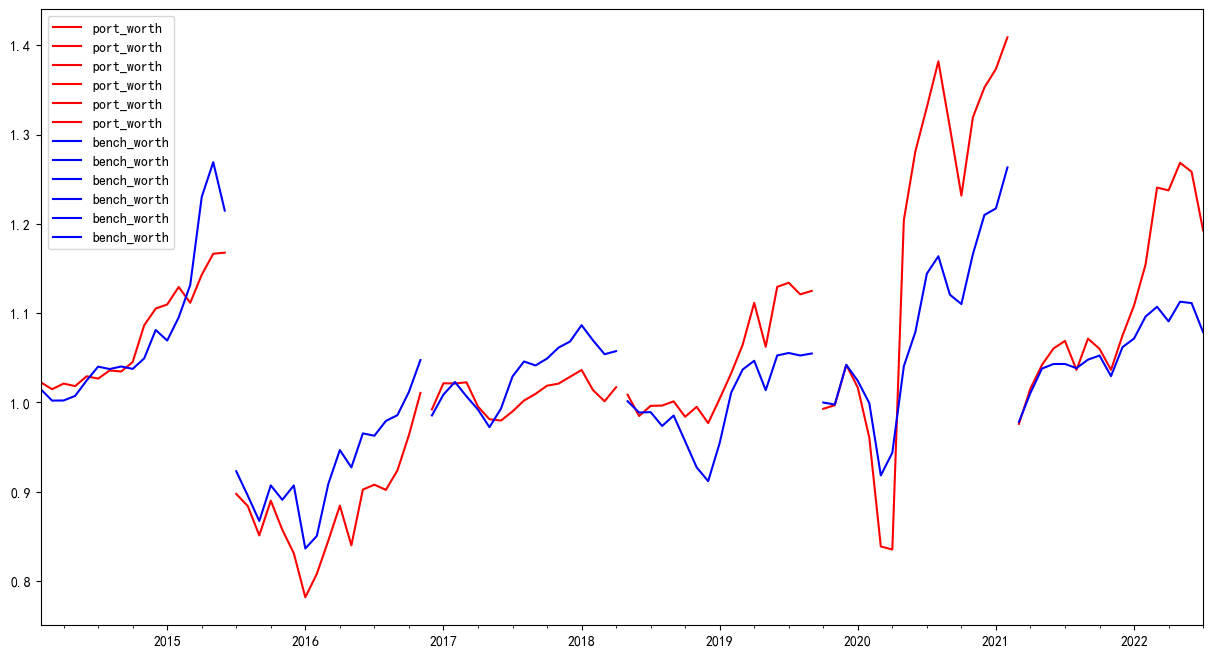

In [10]:
fig, ax = plt.subplots(figsize=(15,8))
for pw in port_ws:
    pw.columns = ['port_worth']
    pw.plot.line(ax=ax, color='r')
for bw in bench_ws:
    bw.columns = ['bench_worth']
    bw.plot(ax=ax, color='b')

ax.plot()

In [11]:
con_pws = ev.get_continue_worth(port_ws)
con_bws = ev.get_continue_worth(bench_ws)

[]

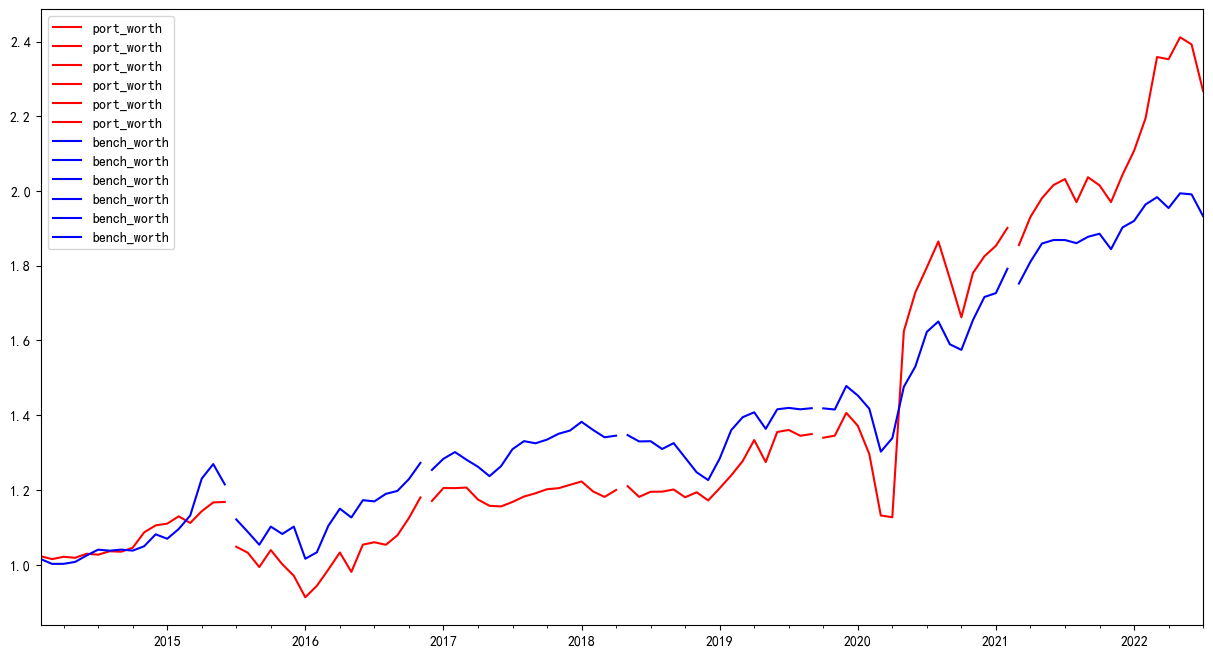

In [12]:
fig, ax = plt.subplots(figsize=(15,8))
for pw in con_pws:
    pw.columns = ['port_worth']
    pw.plot.line(ax=ax, color='r')
for bw in con_bws:
    bw.columns = ['bench_worth']
    bw.plot(ax=ax, color='b')

ax.plot()

In [13]:
# 宏观因子重要性分析

In [14]:
models_list.keys()

dict_keys(['2014-01', '2015-06', '2016-11', '2018-04', '2019-09', '2021-02'])

In [15]:
values=models_list['2014-01'][9][-1][-1].feature_importances_

In [16]:
# values=models_list['2016-01'][9][-1][-1].coef_
# values

In [17]:
names=models_list['2014-01'][9][:-1].get_feature_names_out()
names

array(['lr1__self__lr0__var7(t-15)M0001427_resid',
       'lr1__self__lr0__var299(t-14)G1100322_resid',
       'lr1__self__lr0__var391(t-10)G0003650_resid',
       'lr1__self__lr0__var456(t-4)P0197131',
       'lr1__self__lr0__var391(t-3)G0003650_resid',
       'lr1__self__lr0__var391(t-1)G0003650_resid',
       'lr1__self__ridge0__var7(t-15)M0001427_resid',
       'lr1__self__ridge0__var299(t-14)G1100322_resid',
       'lr1__self__ridge0__var391(t-10)G0003650_resid',
       'lr1__self__ridge0__var456(t-4)P0197131',
       'lr1__self__ridge0__var391(t-3)G0003650_resid',
       'lr1__self__ridge0__var391(t-1)G0003650_resid',
       'lr1__self__sgd0__var103(t-14)M5438207_resid',
       'lr1__self__rf0__var293(t-11)G1112113',
       'lr1__self__rf0__var455(t-4)G0000035_resid',
       'lr1__talibFE__29_mom', 'lr1__talibFE__37_mom',
       'lr1__talibFE__69_mom', 'lr1__talibFE__160_mom',
       'lr1__talibFE__170_mom',
       'ridge1__self__lr0__var7(t-15)M0001427_resid',
       'ridge1__se

In [18]:
fea_imp = pd.DataFrame([names, values], index=['names', 'values'])

In [19]:
fea_imp.sort_values(by='values', axis=1, ascending=False)

,0,90,81,98,85,96,72,121,71,77,...,27,19,18,53,8,20,13,7,26,1
names,lr1__self__lr0__var7(t-15)M0001427_resid,gbr1__talibFE__54_ema12,gbr1__self__ridge0__var171(t-5)M0060433_resid,gbr1__talibFE__183_rsi14,gbr1__self__gbr0__var111(t-10)M5206731_resid,gbr1__talibFE__170_rsi6,rf1__talibFE__126_rsi6,NaN,rf1__talibFE__122_rsi6,rf1__talibFE__146_yoy,...,ridge1__self__ridge0__var299(t-14)G1100322_resid,lr1__talibFE__170_mom,lr1__talibFE__160_mom,sgd1__talibFE__171_PPO,lr1__self__ridge0__var391(t-10)G0003650_resid,ridge1__self__lr0__var7(t-15)M0001427_resid,lr1__self__rf0__var293(t-11)G1112113,lr1__self__ridge0__var299(t-14)G1100322_resid,ridge1__self__ridge0__var7(t-15)M0001427_resid,lr1__self__lr0__var299(t-14)G1100322_resid
values,0.383879,0.036626,0.035196,0.024766,0.02026,0.019056,0.018204,0.017535,0.016751,0.016728,...,0.000486,0.000391,0.000259,0.000243,0.00015,0.000128,0.000108,0.000099,0.000097,0.0


In [20]:
values=models_list['2018-03'][9][-1][-1].feature_importances_
names=models_list['2018-03'][9][:-1].get_feature_names_out()
fea_imp = pd.DataFrame([names, values], index=['names', 'values'])
fea_imp.sort_values(by='values', axis=1, ascending=False)

KeyError: '2018-03'

In [ ]:
values=models_list['2020-05'][9][-1][-1].feature_importances_
names=models_list['2020-05'][9][:-1].get_feature_names_out()
fea_imp = pd.DataFrame([names, values], index=['names', 'values'])
fea_imp.sort_values(by='values', axis=1, ascending=False)

In [ ]:
# 仓位分析

In [21]:
port_poss = [i.port_pos for i in evalor_list]
port_positions = [utils_eda.trans_columns_name(i) for i in port_poss]

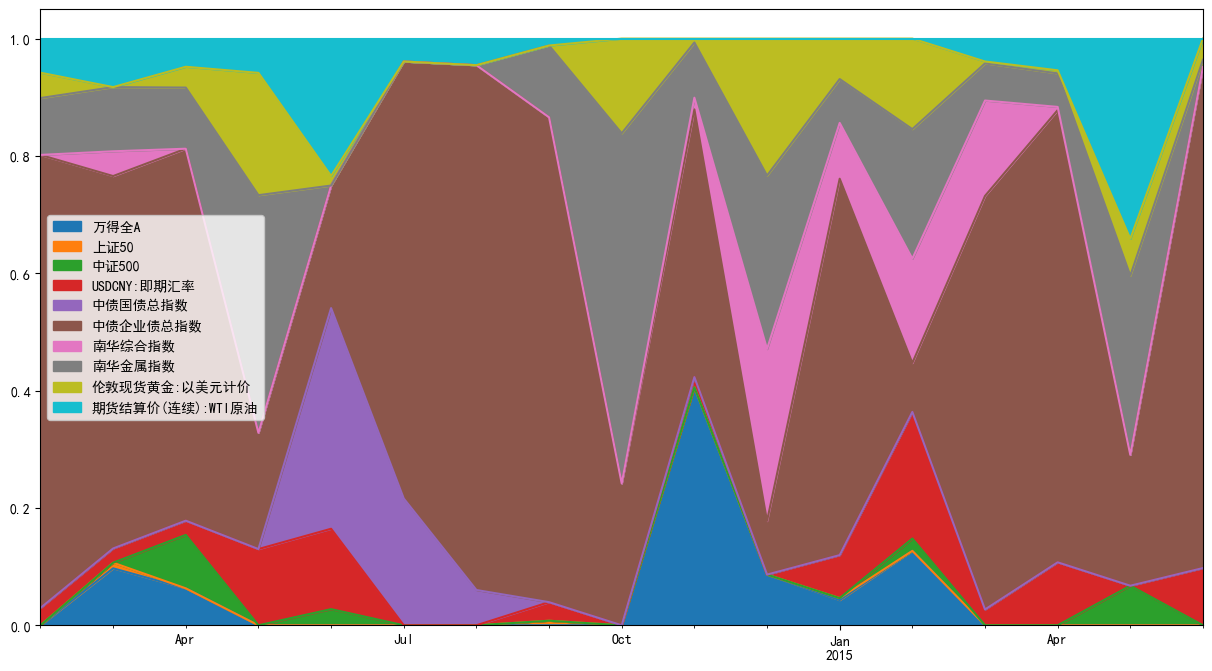

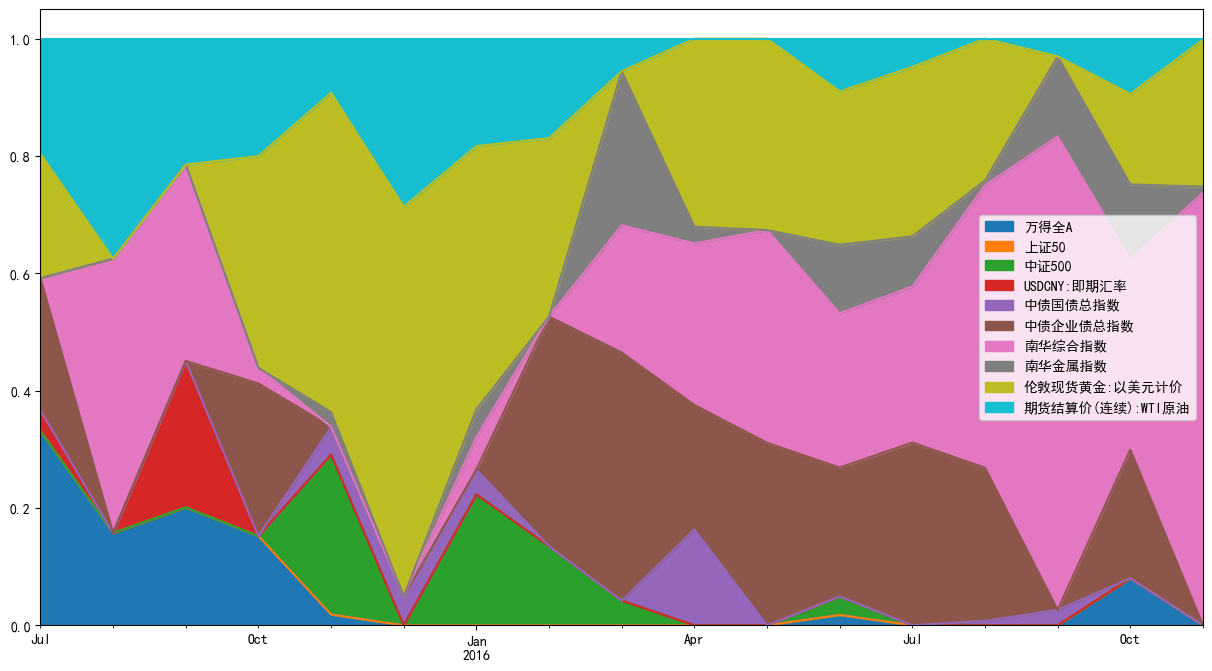

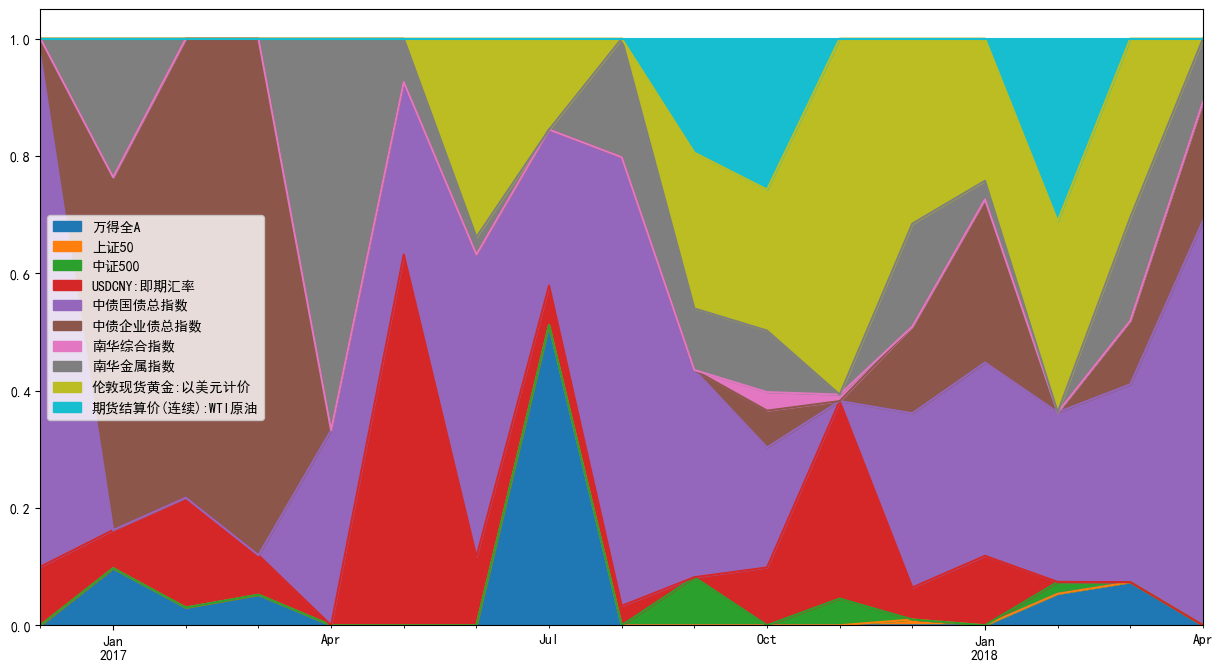

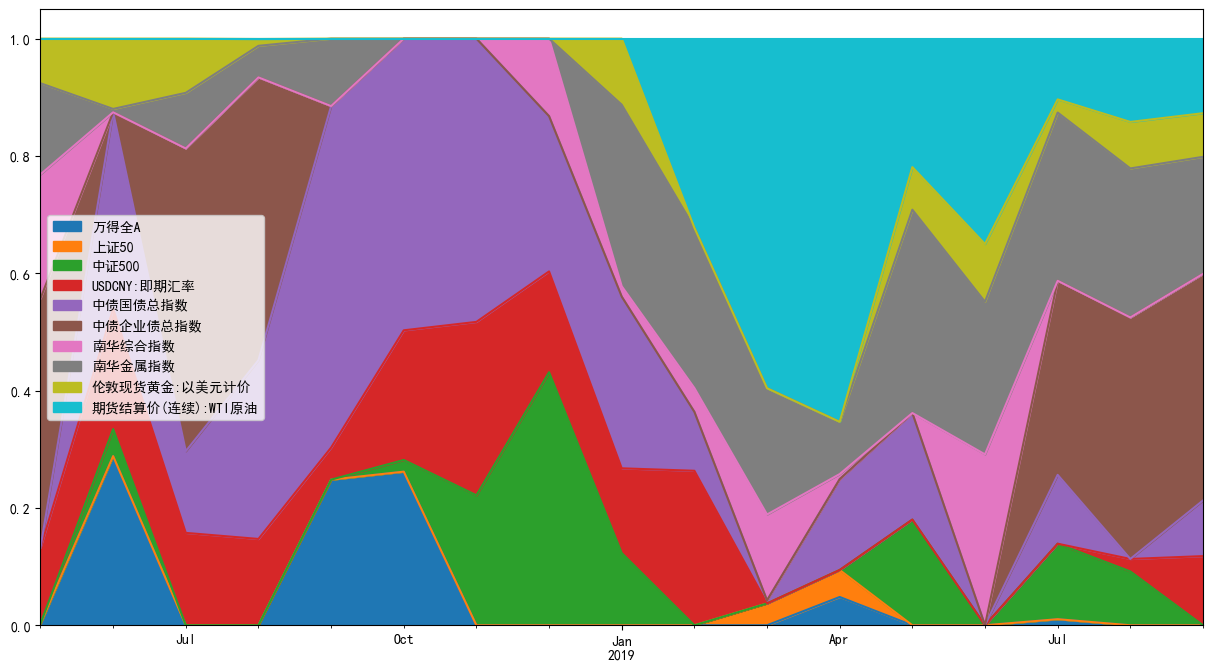

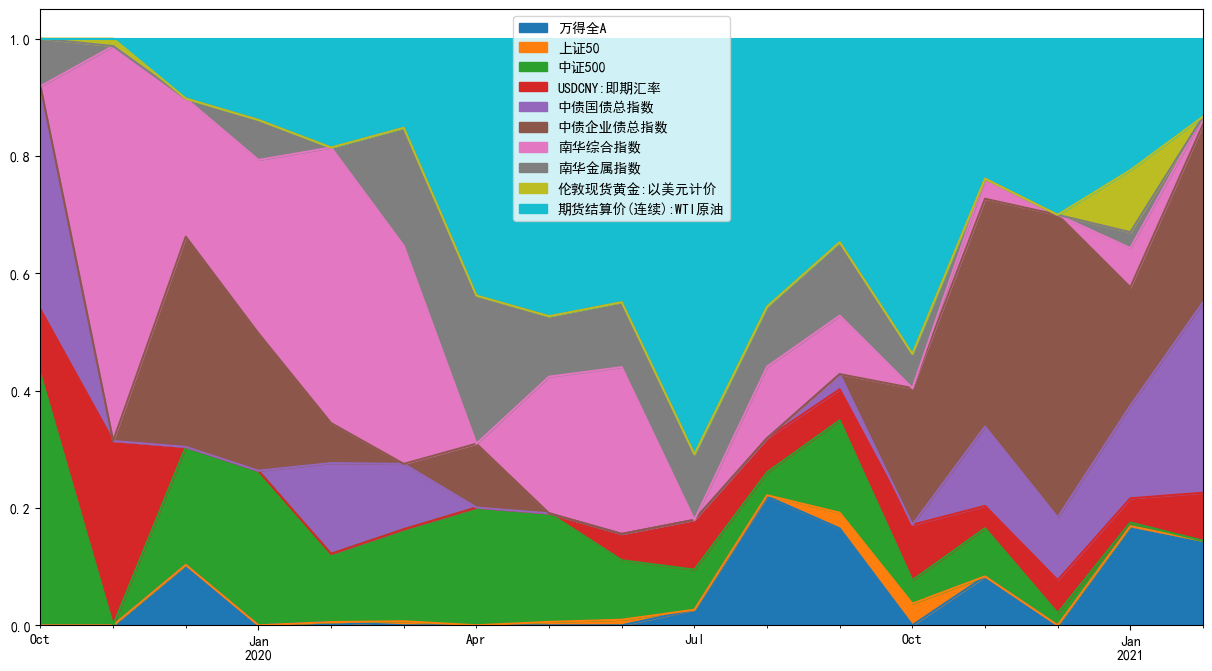

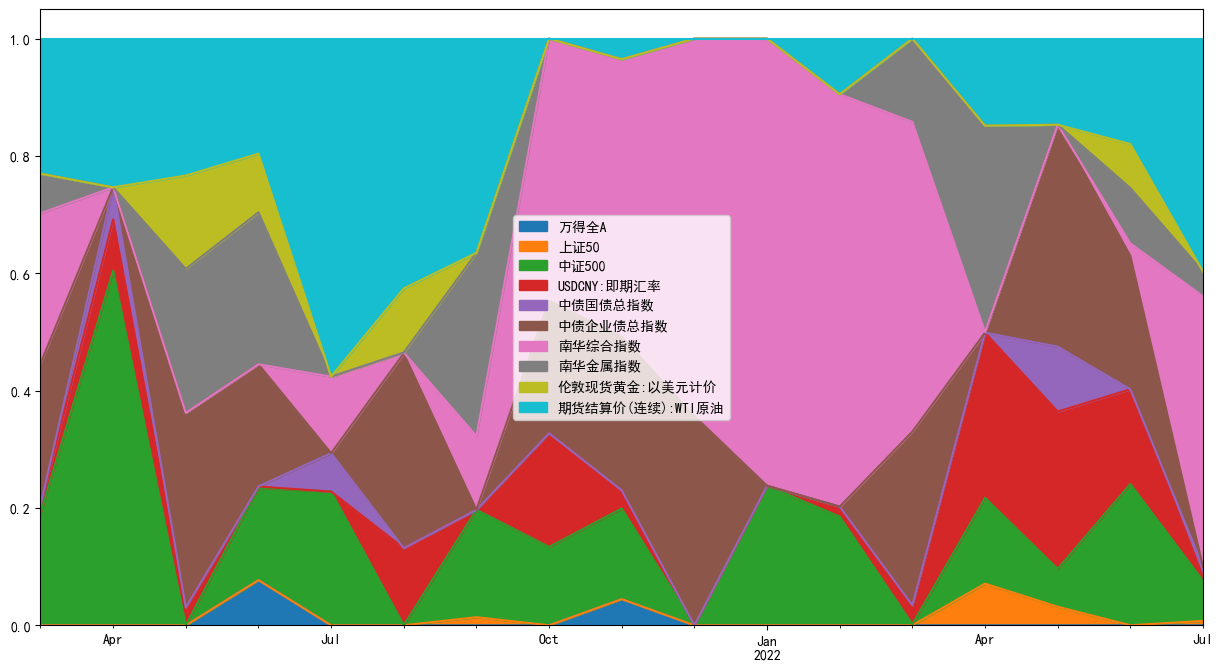

In [22]:
for i in range(len(port_poss)):
    port_positions[i].plot(kind='area',figsize=(15, 8))